# 使用神经网络预测房价

## 导入数据

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import mean_squared_error

In [2]:
train = pd.read_csv("../../kaggle/LosAngelesHousePricesForecast/data/train_1.csv")
if 'Unnamed: 0' in train.columns: 
    train = train.drop(['Unnamed: 0'], axis=1)
y = train["SalePrice"]
train1 = train.drop(["Id", "SalePrice"], axis=1)
X = pd.get_dummies(train1).reset_index(drop=True)
X_train, X_test, y_train, y_test = tts(X,y,test_size=0.2,random_state = 123)  

In [3]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
318,60,90.000000,9900,7,5,1993,1993,256.0,987,0,...,0,0,0,1,0,0,0,0,1,0
580,20,72.461024,14585,6,6,1960,1987,85.0,594,219,...,0,0,0,1,0,0,0,0,1,0
961,60,66.345460,12227,6,7,1977,1995,424.0,896,0,...,0,0,0,1,0,0,0,0,1,0
78,90,72.000000,10778,4,5,1968,1968,0.0,0,0,...,0,0,0,1,0,0,0,0,1,0
5,50,85.000000,14115,5,5,1993,1995,0.0,732,0,...,0,0,0,1,0,0,0,0,1,0


## 评估函数

In [4]:
def benchmark(model,X_test, y_test):
    pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    logrmse = np.sqrt(mean_squared_error(np.log(y_test), np.log(pred)))
    print("RMSE: {} \nLOGRMSE: {}".format(rmse, logrmse))

In [5]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import metrics
from keras import backend as K
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

Using TensorFlow backend.


## 练习一：简单神经网络

In [6]:
def create_model():
    model=Sequential()
    model.add(Dense(10,input_dim=X_train.shape[1],activation='relu'))
    model.add(Dense(300,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50,activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam',loss='mean_squared_error')
    return model

### 使用网格搜索

In [9]:
batch_size = [16, 32, 48, 64, 80, 96]
epochs = [500, 1000, 2000, 3000, 3500, 4000]

model = model = KerasRegressor(build_fn=create_model)

param_grid = dict(batch_size=batch_size,epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=0, cv=5, n_jobs=-1)
result = grid.fit(X_train, y_train)
for mean,stdev,param in zip(result.cv_results_['mean_test_score'],
                           result.cv_results_['std_test_score'],
                           result.cv_results_['params']):
    print("mean:{} stdev:{} param:{}".format(mean,stdev,param))
print("Best score: {} Best param:{}".format(result.best_score_, result.best_params_))

/root/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Epoch 1/4000
1168/1168 [==============================] - 0s 366us/step - loss: 38470201007.3425
Epoch 2/4000
1168/1168 [==============================] - 0s 37us/step - loss: 33327558151.0137
Epoch 3/4000
1168/1168 [==============================] - 0s 36us/step - loss: 15063982378.0822
Epoch 4/4000
1168/1168 [==============================] - 0s 36us/step - loss: 7785795296.4384
Epoch 5/4000
1168/1168 [==============================] - 0s 37us/step - loss: 5866206306.1918
Epoch 6/4000
1168/1168 [==============================] - 0s 36us/step - loss: 5108213617.9726
Epoch 7/4000
1168/1168 [==============================] - 0s 37us/step - loss: 4254386339.0685
Epoch 8/4000
1168/1168 [==============================] - 0s 36us/step - loss: 3990058750.2466
Epoch 9/4000
1168/1168 [==============================] - 0s 35us/step - loss: 3655116480.8767
Epoch 10/4000
1168/1168 [==============================] - 0s 36us/step - loss: 3459133578.5205
Epoch 11/4000
1168/1168 [====================

1168/1168 [==============================] - 0s 37us/step - loss: 1533512214.7945
Epoch 171/4000
1168/1168 [==============================] - 0s 36us/step - loss: 1554042074.3014
Epoch 172/4000
1168/1168 [==============================] - 0s 36us/step - loss: 1570855950.9041
Epoch 173/4000
1168/1168 [==============================] - 0s 36us/step - loss: 1585339625.2055
Epoch 174/4000
1168/1168 [==============================] - 0s 36us/step - loss: 1536481242.3014
Epoch 175/4000
1168/1168 [==============================] - 0s 37us/step - loss: 1512949824.0000
Epoch 176/4000
1168/1168 [==============================] - 0s 37us/step - loss: 1596106861.5890
Epoch 177/4000
1168/1168 [==============================] - 0s 37us/step - loss: 1570695028.3836
Epoch 178/4000
1168/1168 [==============================] - 0s 36us/step - loss: 1570409084.4932
Epoch 179/4000
1168/1168 [==============================] - 0s 37us/step - loss: 1617032382.2466
Epoch 180/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 36us/step - loss: 942169717.9178
Epoch 339/4000
1168/1168 [==============================] - 0s 37us/step - loss: 941762129.0959
Epoch 340/4000
1168/1168 [==============================] - 0s 36us/step - loss: 892732886.7945
Epoch 341/4000
1168/1168 [==============================] - 0s 36us/step - loss: 916864690.8493
Epoch 342/4000
1168/1168 [==============================] - 0s 37us/step - loss: 902206188.7123
Epoch 343/4000
1168/1168 [==============================] - 0s 37us/step - loss: 896672740.8219
Epoch 344/4000
1168/1168 [==============================] - 0s 36us/step - loss: 947757656.5479
Epoch 345/4000
1168/1168 [==============================] - 0s 36us/step - loss: 894572238.0274
Epoch 346/4000
1168/1168 [==============================] - 0s 36us/step - loss: 943308810.5205
Epoch 347/4000
1168/1168 [==============================] - 0s 36us/step - loss: 890666671.3425
Epoch 348/4000
1168/1168 [=============================

1168/1168 [==============================] - 0s 37us/step - loss: 625639534.0274
Epoch 509/4000
1168/1168 [==============================] - 0s 36us/step - loss: 609637017.6438
Epoch 510/4000
1168/1168 [==============================] - 0s 36us/step - loss: 631897329.9726
Epoch 511/4000
1168/1168 [==============================] - 0s 36us/step - loss: 586427493.2603
Epoch 512/4000
1168/1168 [==============================] - 0s 36us/step - loss: 622388320.8767
Epoch 513/4000
1168/1168 [==============================] - 0s 37us/step - loss: 611790114.6301
Epoch 514/4000
1168/1168 [==============================] - 0s 36us/step - loss: 551851324.9315
Epoch 515/4000
1168/1168 [==============================] - 0s 35us/step - loss: 599101064.7671
Epoch 516/4000
1168/1168 [==============================] - 0s 36us/step - loss: 669049845.0411
Epoch 517/4000
1168/1168 [==============================] - 0s 36us/step - loss: 609194037.0411
Epoch 518/4000
1168/1168 [=============================

1168/1168 [==============================] - 0s 40us/step - loss: 510818394.3014
Epoch 679/4000
1168/1168 [==============================] - 0s 42us/step - loss: 477371634.4110
Epoch 680/4000
1168/1168 [==============================] - 0s 37us/step - loss: 508778887.0137
Epoch 681/4000
1168/1168 [==============================] - 0s 36us/step - loss: 584200008.9863
Epoch 682/4000
1168/1168 [==============================] - 0s 37us/step - loss: 528665857.0959
Epoch 683/4000
1168/1168 [==============================] - 0s 38us/step - loss: 484437393.7534
Epoch 684/4000
1168/1168 [==============================] - 0s 36us/step - loss: 509905495.2329
Epoch 685/4000
1168/1168 [==============================] - 0s 37us/step - loss: 492622039.2329
Epoch 686/4000
1168/1168 [==============================] - 0s 36us/step - loss: 481127050.7397
Epoch 687/4000
1168/1168 [==============================] - 0s 36us/step - loss: 479352987.8356
Epoch 688/4000
1168/1168 [=============================

1168/1168 [==============================] - 0s 36us/step - loss: 422577842.4110
Epoch 849/4000
1168/1168 [==============================] - 0s 36us/step - loss: 523353932.0548
Epoch 850/4000
1168/1168 [==============================] - 0s 35us/step - loss: 416202228.3836
Epoch 851/4000
1168/1168 [==============================] - 0s 36us/step - loss: 402547884.2740
Epoch 852/4000
1168/1168 [==============================] - 0s 37us/step - loss: 412542438.3562
Epoch 853/4000
1168/1168 [==============================] - 0s 37us/step - loss: 420498620.9315
Epoch 854/4000
1168/1168 [==============================] - 0s 35us/step - loss: 423732593.5342
Epoch 855/4000
1168/1168 [==============================] - 0s 36us/step - loss: 440051484.0548
Epoch 856/4000
1168/1168 [==============================] - 0s 37us/step - loss: 403302556.0548
Epoch 857/4000
1168/1168 [==============================] - 0s 37us/step - loss: 469795818.9589
Epoch 858/4000
1168/1168 [=============================

1168/1168 [==============================] - 0s 36us/step - loss: 393655521.0959
Epoch 1019/4000
1168/1168 [==============================] - 0s 37us/step - loss: 424756295.2329
Epoch 1020/4000
1168/1168 [==============================] - 0s 35us/step - loss: 504871170.1918
Epoch 1021/4000
1168/1168 [==============================] - 0s 37us/step - loss: 389755054.4658
Epoch 1022/4000
1168/1168 [==============================] - 0s 37us/step - loss: 363802864.6575
Epoch 1023/4000
1168/1168 [==============================] - 0s 36us/step - loss: 421086602.0822
Epoch 1024/4000
1168/1168 [==============================] - 0s 37us/step - loss: 379887498.9589
Epoch 1025/4000
1168/1168 [==============================] - 0s 36us/step - loss: 390254924.0548
Epoch 1026/4000
1168/1168 [==============================] - 0s 36us/step - loss: 414772744.3288
Epoch 1027/4000
1168/1168 [==============================] - 0s 35us/step - loss: 387209604.6027
Epoch 1028/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 37us/step - loss: 332664217.4247
Epoch 1187/4000
1168/1168 [==============================] - 0s 37us/step - loss: 338015160.3288
Epoch 1188/4000
1168/1168 [==============================] - 0s 37us/step - loss: 320108390.1370
Epoch 1189/4000
1168/1168 [==============================] - 0s 37us/step - loss: 337701995.6164
Epoch 1190/4000
1168/1168 [==============================] - 0s 36us/step - loss: 315182496.6575
Epoch 1191/4000
1168/1168 [==============================] - 0s 37us/step - loss: 364574043.6164
Epoch 1192/4000
1168/1168 [==============================] - 0s 37us/step - loss: 374140620.4932
Epoch 1193/4000
1168/1168 [==============================] - 0s 37us/step - loss: 366676759.2329
Epoch 1194/4000
1168/1168 [==============================] - 0s 37us/step - loss: 338301746.6301
Epoch 1195/4000
1168/1168 [==============================] - 0s 36us/step - loss: 357296119.6712
Epoch 1196/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 36us/step - loss: 302584274.4110
Epoch 1355/4000
1168/1168 [==============================] - 0s 37us/step - loss: 345687701.9178
Epoch 1356/4000
1168/1168 [==============================] - 0s 37us/step - loss: 340173813.6986
Epoch 1357/4000
1168/1168 [==============================] - 0s 36us/step - loss: 332323435.5068
Epoch 1358/4000
1168/1168 [==============================] - 0s 37us/step - loss: 342859090.1918
Epoch 1359/4000
1168/1168 [==============================] - 0s 37us/step - loss: 343416859.6164
Epoch 1360/4000
1168/1168 [==============================] - 0s 36us/step - loss: 315368542.9041
Epoch 1361/4000
1168/1168 [==============================] - 0s 36us/step - loss: 290009902.0274
Epoch 1362/4000
1168/1168 [==============================] - 0s 36us/step - loss: 301793400.5479
Epoch 1363/4000
1168/1168 [==============================] - 0s 36us/step - loss: 325705954.1918
Epoch 1364/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 35us/step - loss: 333674935.8904
Epoch 1523/4000
1168/1168 [==============================] - 0s 36us/step - loss: 387875928.3288
Epoch 1524/4000
1168/1168 [==============================] - 0s 36us/step - loss: 311598153.6438
Epoch 1525/4000
1168/1168 [==============================] - 0s 36us/step - loss: 305637655.0137
Epoch 1526/4000
1168/1168 [==============================] - 0s 35us/step - loss: 301561785.6438
Epoch 1527/4000
1168/1168 [==============================] - 0s 35us/step - loss: 322888872.3288
Epoch 1528/4000
1168/1168 [==============================] - 0s 36us/step - loss: 297019271.2329
Epoch 1529/4000
1168/1168 [==============================] - 0s 36us/step - loss: 327277362.4110
Epoch 1530/4000
1168/1168 [==============================] - 0s 36us/step - loss: 301460660.8219
Epoch 1531/4000
1168/1168 [==============================] - 0s 36us/step - loss: 305324293.0411
Epoch 1532/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 36us/step - loss: 352046677.9178
Epoch 1691/4000
1168/1168 [==============================] - 0s 34us/step - loss: 331045658.9589
Epoch 1692/4000
1168/1168 [==============================] - 0s 35us/step - loss: 341079536.6575
Epoch 1693/4000
1168/1168 [==============================] - 0s 35us/step - loss: 370089858.1918
Epoch 1694/4000
1168/1168 [==============================] - 0s 35us/step - loss: 360832038.7945
Epoch 1695/4000
1168/1168 [==============================] - 0s 35us/step - loss: 352939320.7671
Epoch 1696/4000
1168/1168 [==============================] - 0s 35us/step - loss: 342074425.2055
Epoch 1697/4000
1168/1168 [==============================] - 0s 33us/step - loss: 269055893.6986
Epoch 1698/4000
1168/1168 [==============================] - 0s 35us/step - loss: 261417824.1096
Epoch 1699/4000
1168/1168 [==============================] - 0s 35us/step - loss: 305194141.3699
Epoch 1700/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 35us/step - loss: 289884955.9452
Epoch 1859/4000
1168/1168 [==============================] - 0s 35us/step - loss: 297433966.0274
Epoch 1860/4000
1168/1168 [==============================] - 0s 36us/step - loss: 294789919.1233
Epoch 1861/4000
1168/1168 [==============================] - 0s 36us/step - loss: 360649826.6301
Epoch 1862/4000
1168/1168 [==============================] - 0s 36us/step - loss: 332358131.5068
Epoch 1863/4000
1168/1168 [==============================] - 0s 37us/step - loss: 277644133.6986
Epoch 1864/4000
1168/1168 [==============================] - 0s 36us/step - loss: 283441089.9726
Epoch 1865/4000
1168/1168 [==============================] - 0s 36us/step - loss: 272856056.4384
Epoch 1866/4000
1168/1168 [==============================] - 0s 35us/step - loss: 256602261.8082
Epoch 1867/4000
1168/1168 [==============================] - 0s 36us/step - loss: 297479820.4932
Epoch 1868/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 35us/step - loss: 267224128.0000
Epoch 2027/4000
1168/1168 [==============================] - 0s 36us/step - loss: 333391975.2877
Epoch 2028/4000
1168/1168 [==============================] - 0s 36us/step - loss: 299997509.4795
Epoch 2029/4000
1168/1168 [==============================] - 0s 35us/step - loss: 279844031.1233
Epoch 2030/4000
1168/1168 [==============================] - 0s 35us/step - loss: 261593264.7671
Epoch 2031/4000
1168/1168 [==============================] - 0s 36us/step - loss: 251663082.3014
Epoch 2032/4000
1168/1168 [==============================] - 0s 36us/step - loss: 294695919.3425
Epoch 2033/4000
1168/1168 [==============================] - 0s 35us/step - loss: 284395094.6849
Epoch 2034/4000
1168/1168 [==============================] - 0s 37us/step - loss: 283357536.5479
Epoch 2035/4000
1168/1168 [==============================] - 0s 36us/step - loss: 293881203.2877
Epoch 2036/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 40us/step - loss: 285790391.2329
Epoch 2195/4000
1168/1168 [==============================] - 0s 37us/step - loss: 281308820.4932
Epoch 2196/4000
1168/1168 [==============================] - 0s 38us/step - loss: 246921664.4384
Epoch 2197/4000
1168/1168 [==============================] - 0s 36us/step - loss: 300274756.6027
Epoch 2198/4000
1168/1168 [==============================] - 0s 38us/step - loss: 289711774.2466
Epoch 2199/4000
1168/1168 [==============================] - 0s 37us/step - loss: 302201482.8493
Epoch 2200/4000
1168/1168 [==============================] - 0s 37us/step - loss: 264563958.5753
Epoch 2201/4000
1168/1168 [==============================] - 0s 37us/step - loss: 255438117.6986
Epoch 2202/4000
1168/1168 [==============================] - 0s 37us/step - loss: 278411168.8767
Epoch 2203/4000
1168/1168 [==============================] - 0s 37us/step - loss: 260356120.0000
Epoch 2204/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 37us/step - loss: 254617832.9863
Epoch 2363/4000
1168/1168 [==============================] - 0s 36us/step - loss: 268504974.5753
Epoch 2364/4000
1168/1168 [==============================] - 0s 36us/step - loss: 342408113.7534
Epoch 2365/4000
1168/1168 [==============================] - 0s 36us/step - loss: 319756565.6986
Epoch 2366/4000
1168/1168 [==============================] - 0s 36us/step - loss: 310974805.4795
Epoch 2367/4000
1168/1168 [==============================] - 0s 36us/step - loss: 273435643.1781
Epoch 2368/4000
1168/1168 [==============================] - 0s 35us/step - loss: 272811448.7671
Epoch 2369/4000
1168/1168 [==============================] - 0s 36us/step - loss: 280052400.4384
Epoch 2370/4000
1168/1168 [==============================] - 0s 36us/step - loss: 530447874.6301
Epoch 2371/4000
1168/1168 [==============================] - 0s 36us/step - loss: 492184051.9452
Epoch 2372/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 36us/step - loss: 250739066.0822
Epoch 2531/4000
1168/1168 [==============================] - 0s 36us/step - loss: 238783792.2192
Epoch 2532/4000
1168/1168 [==============================] - 0s 35us/step - loss: 268480384.8767
Epoch 2533/4000
1168/1168 [==============================] - 0s 36us/step - loss: 288891585.9726
Epoch 2534/4000
1168/1168 [==============================] - 0s 36us/step - loss: 256948939.1781
Epoch 2535/4000
1168/1168 [==============================] - 0s 36us/step - loss: 263503523.1781
Epoch 2536/4000
1168/1168 [==============================] - 0s 37us/step - loss: 277696278.4658
Epoch 2537/4000
1168/1168 [==============================] - 0s 36us/step - loss: 310677425.5342
Epoch 2538/4000
1168/1168 [==============================] - 0s 39us/step - loss: 325146341.4795
Epoch 2539/4000
1168/1168 [==============================] - 0s 37us/step - loss: 242578643.9452
Epoch 2540/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 36us/step - loss: 292017110.1370
Epoch 2699/4000
1168/1168 [==============================] - 0s 36us/step - loss: 322718685.8082
Epoch 2700/4000
1168/1168 [==============================] - 0s 36us/step - loss: 320831542.7945
Epoch 2701/4000
1168/1168 [==============================] - 0s 35us/step - loss: 298758368.3288
Epoch 2702/4000
1168/1168 [==============================] - 0s 36us/step - loss: 298367268.7123
Epoch 2703/4000
1168/1168 [==============================] - 0s 36us/step - loss: 272771064.0000
Epoch 2704/4000
1168/1168 [==============================] - 0s 38us/step - loss: 289103983.7808
Epoch 2705/4000
1168/1168 [==============================] - 0s 36us/step - loss: 317513936.0000
Epoch 2706/4000
1168/1168 [==============================] - 0s 35us/step - loss: 338364969.2055
Epoch 2707/4000
1168/1168 [==============================] - 0s 36us/step - loss: 259172873.7534
Epoch 2708/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 36us/step - loss: 252665326.0274
Epoch 2867/4000
1168/1168 [==============================] - 0s 37us/step - loss: 263968498.6301
Epoch 2868/4000
1168/1168 [==============================] - 0s 37us/step - loss: 261394965.6986
Epoch 2869/4000
1168/1168 [==============================] - 0s 36us/step - loss: 265400384.8767
Epoch 2870/4000
1168/1168 [==============================] - 0s 37us/step - loss: 269339693.8082
Epoch 2871/4000
1168/1168 [==============================] - 0s 36us/step - loss: 259230190.9041
Epoch 2872/4000
1168/1168 [==============================] - 0s 36us/step - loss: 255068184.3288
Epoch 2873/4000
1168/1168 [==============================] - 0s 36us/step - loss: 282252931.2877
Epoch 2874/4000
1168/1168 [==============================] - 0s 36us/step - loss: 252481168.1096
Epoch 2875/4000
1168/1168 [==============================] - 0s 37us/step - loss: 254194117.2603
Epoch 2876/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 37us/step - loss: 240263206.3562
Epoch 3035/4000
1168/1168 [==============================] - 0s 37us/step - loss: 216911476.2740
Epoch 3036/4000
1168/1168 [==============================] - 0s 37us/step - loss: 260105371.1781
Epoch 3037/4000
1168/1168 [==============================] - 0s 36us/step - loss: 233769611.3973
Epoch 3038/4000
1168/1168 [==============================] - 0s 37us/step - loss: 228592711.1233
Epoch 3039/4000
1168/1168 [==============================] - 0s 36us/step - loss: 235547701.1507
Epoch 3040/4000
1168/1168 [==============================] - 0s 36us/step - loss: 239315149.6986
Epoch 3041/4000
1168/1168 [==============================] - 0s 35us/step - loss: 253877887.8904
Epoch 3042/4000
1168/1168 [==============================] - 0s 37us/step - loss: 232951856.3288
Epoch 3043/4000
1168/1168 [==============================] - 0s 36us/step - loss: 259666553.6438
Epoch 3044/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 36us/step - loss: 227236259.0685
Epoch 3203/4000
1168/1168 [==============================] - 0s 36us/step - loss: 233558799.4521
Epoch 3204/4000
1168/1168 [==============================] - 0s 36us/step - loss: 245233531.7260
Epoch 3205/4000
1168/1168 [==============================] - 0s 36us/step - loss: 242233251.2877
Epoch 3206/4000
1168/1168 [==============================] - 0s 38us/step - loss: 249479310.1370
Epoch 3207/4000
1168/1168 [==============================] - 0s 36us/step - loss: 257279552.3288
Epoch 3208/4000
1168/1168 [==============================] - 0s 35us/step - loss: 255007141.4795
Epoch 3209/4000
1168/1168 [==============================] - 0s 36us/step - loss: 249402554.0822
Epoch 3210/4000
1168/1168 [==============================] - 0s 36us/step - loss: 303926753.3151
Epoch 3211/4000
1168/1168 [==============================] - 0s 37us/step - loss: 351113728.6575
Epoch 3212/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 35us/step - loss: 239081012.0548
Epoch 3371/4000
1168/1168 [==============================] - 0s 35us/step - loss: 220697401.9726
Epoch 3372/4000
1168/1168 [==============================] - 0s 37us/step - loss: 232125047.8904
Epoch 3373/4000
1168/1168 [==============================] - 0s 36us/step - loss: 217280520.3288
Epoch 3374/4000
1168/1168 [==============================] - 0s 36us/step - loss: 244713398.2466
Epoch 3375/4000
1168/1168 [==============================] - 0s 36us/step - loss: 256914444.8219
Epoch 3376/4000
1168/1168 [==============================] - 0s 35us/step - loss: 282385179.9452
Epoch 3377/4000
1168/1168 [==============================] - 0s 37us/step - loss: 226085656.3288
Epoch 3378/4000
1168/1168 [==============================] - 0s 36us/step - loss: 266423951.3425
Epoch 3379/4000
1168/1168 [==============================] - 0s 36us/step - loss: 227988572.0548
Epoch 3380/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 36us/step - loss: 269485328.2192
Epoch 3539/4000
1168/1168 [==============================] - 0s 36us/step - loss: 249159014.2466
Epoch 3540/4000
1168/1168 [==============================] - 0s 36us/step - loss: 247873532.4932
Epoch 3541/4000
1168/1168 [==============================] - 0s 37us/step - loss: 246122864.5479
Epoch 3542/4000
1168/1168 [==============================] - 0s 37us/step - loss: 233826625.8630
Epoch 3543/4000
1168/1168 [==============================] - 0s 39us/step - loss: 234105007.1233
Epoch 3544/4000
1168/1168 [==============================] - 0s 37us/step - loss: 247944771.5068
Epoch 3545/4000
1168/1168 [==============================] - 0s 36us/step - loss: 264374063.3425
Epoch 3546/4000
1168/1168 [==============================] - 0s 37us/step - loss: 251473244.8219
Epoch 3547/4000
1168/1168 [==============================] - 0s 36us/step - loss: 230654240.0000
Epoch 3548/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 36us/step - loss: 220290119.6712
Epoch 3707/4000
1168/1168 [==============================] - 0s 35us/step - loss: 218997683.9452
Epoch 3708/4000
1168/1168 [==============================] - 0s 36us/step - loss: 228194668.0548
Epoch 3709/4000
1168/1168 [==============================] - 0s 35us/step - loss: 222114150.1370
Epoch 3710/4000
1168/1168 [==============================] - 0s 35us/step - loss: 239525239.7808
Epoch 3711/4000
1168/1168 [==============================] - 0s 35us/step - loss: 259707409.9726
Epoch 3712/4000
1168/1168 [==============================] - 0s 36us/step - loss: 212615973.3699
Epoch 3713/4000
1168/1168 [==============================] - 0s 37us/step - loss: 223503842.4110
Epoch 3714/4000
1168/1168 [==============================] - 0s 36us/step - loss: 216568578.1918
Epoch 3715/4000
1168/1168 [==============================] - 0s 35us/step - loss: 222862575.8904
Epoch 3716/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 36us/step - loss: 341367569.7534
Epoch 3875/4000
1168/1168 [==============================] - 0s 35us/step - loss: 376013563.1781
Epoch 3876/4000
1168/1168 [==============================] - 0s 35us/step - loss: 469756636.7123
Epoch 3877/4000
1168/1168 [==============================] - 0s 34us/step - loss: 332941129.6438
Epoch 3878/4000
1168/1168 [==============================] - 0s 34us/step - loss: 251551266.7397
Epoch 3879/4000
1168/1168 [==============================] - 0s 35us/step - loss: 276980086.1370
Epoch 3880/4000
1168/1168 [==============================] - 0s 35us/step - loss: 214786008.5479
Epoch 3881/4000
1168/1168 [==============================] - 0s 35us/step - loss: 205544669.3699
Epoch 3882/4000
1168/1168 [==============================] - 0s 35us/step - loss: 223327950.6849
Epoch 3883/4000
1168/1168 [==============================] - 0s 36us/step - loss: 223030371.7260
Epoch 3884/4000
1168/1168 [===================

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
import time

In [15]:
def model_fit(batch_size, epochs, X_train, y_train, X_test):
    model = create_model()

    start_time = time.time()
    history = model.fit(X_train,y_train,epochs=epochs,batch_size=batch_size,verbose=0)
    end_time = time.time()
    print("Cost time: {} s".format(end_time - start_time))

    benchmark(model,X_test, y_test)
    plt.plot(history.history['loss'])

Cost time: 166.5028998851776 s
RMSE: 28230.3377086496 
LOGRMSE: 0.12977596582241094


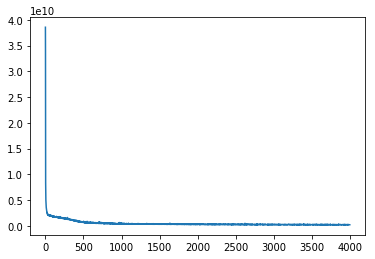

In [16]:
# Best score: -985028213.6712328 Best param:{'batch_size': 48, 'epochs': 4000}
batch_size = 48
epochs = 4000
model_fit(batch_size, epochs, X_train, y_train, X_test)

- 通过gridsearch得到最佳参数为'batch_size': 48, 'epochs': 4000；接下来可以固定batch_size在格点搜索4000附近的epochs

In [19]:
batch_size = [48]
epochs = range(4400,5000,100)
# Best score: -1246945380.6027398 Best param:{'batch_size': 48, 'epochs': 4400}
model = model = KerasRegressor(build_fn=create_model)

param_grid = dict(batch_size=batch_size,epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=0, cv=5, n_jobs=-1)
result = grid.fit(X_train, y_train)
for mean,stdev,param in zip(result.cv_results_['mean_test_score'],
                           result.cv_results_['std_test_score'],
                           result.cv_results_['params']):
    print("mean:{} stdev:{} param:{}".format(mean,stdev,param))
print("Best score: {} Best param:{}".format(result.best_score_, result.best_params_))

/root/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Epoch 1/4800
1168/1168 [==============================] - 1s 438us/step - loss: 38156689267.7260
Epoch 2/4800
1168/1168 [==============================] - 0s 38us/step - loss: 32504440411.1781
Epoch 3/4800
1168/1168 [==============================] - 0s 37us/step - loss: 16386923881.2055
Epoch 4/4800
1168/1168 [==============================] - 0s 38us/step - loss: 7805597091.0685
Epoch 5/4800
1168/1168 [==============================] - 0s 37us/step - loss: 6714897669.2603
Epoch 6/4800
1168/1168 [==============================] - 0s 37us/step - loss: 5680864766.2466
Epoch 7/4800
1168/1168 [==============================] - 0s 38us/step - loss: 5287464177.9726
Epoch 8/4800
1168/1168 [==============================] - 0s 37us/step - loss: 4954664340.1644
Epoch 9/4800
1168/1168 [==============================] - 0s 38us/step - loss: 4361911210.0822
Epoch 10/4800
1168/1168 [==============================] - 0s 37us/step - loss: 4048980078.4658
Epoch 11/4800
1168/1168 [====================

1168/1168 [==============================] - 0s 37us/step - loss: 1217642449.9726
Epoch 171/4800
1168/1168 [==============================] - 0s 37us/step - loss: 1284564442.3014
Epoch 172/4800
1168/1168 [==============================] - 0s 37us/step - loss: 1243831581.8082
Epoch 173/4800
1168/1168 [==============================] - 0s 38us/step - loss: 1279936804.8219
Epoch 174/4800
1168/1168 [==============================] - 0s 38us/step - loss: 1226354858.9589
Epoch 175/4800
1168/1168 [==============================] - 0s 39us/step - loss: 1230334192.2192
Epoch 176/4800
1168/1168 [==============================] - 0s 38us/step - loss: 1286302996.6027
Epoch 177/4800
1168/1168 [==============================] - 0s 38us/step - loss: 1226004310.3562
Epoch 178/4800
1168/1168 [==============================] - 0s 37us/step - loss: 1226640824.9863
Epoch 179/4800
1168/1168 [==============================] - 0s 37us/step - loss: 1191428616.3288
Epoch 180/4800
1168/1168 [===================

1168/1168 [==============================] - 0s 38us/step - loss: 738893052.0548
Epoch 340/4800
1168/1168 [==============================] - 0s 39us/step - loss: 692834280.3288
Epoch 341/4800
1168/1168 [==============================] - 0s 39us/step - loss: 647216174.9041
Epoch 342/4800
1168/1168 [==============================] - 0s 38us/step - loss: 649223441.0959
Epoch 343/4800
1168/1168 [==============================] - 0s 38us/step - loss: 714582050.6301
Epoch 344/4800
1168/1168 [==============================] - 0s 38us/step - loss: 709868932.3836
Epoch 345/4800
1168/1168 [==============================] - 0s 38us/step - loss: 631101863.6712
Epoch 346/4800
1168/1168 [==============================] - 0s 38us/step - loss: 666478732.7123
Epoch 347/4800
1168/1168 [==============================] - 0s 38us/step - loss: 649572715.3973
Epoch 348/4800
1168/1168 [==============================] - 0s 37us/step - loss: 701645870.0274
Epoch 349/4800
1168/1168 [=============================

1168/1168 [==============================] - 0s 37us/step - loss: 713138917.9178
Epoch 510/4800
1168/1168 [==============================] - 0s 37us/step - loss: 627187275.8356
Epoch 511/4800
1168/1168 [==============================] - 0s 37us/step - loss: 533170627.0685
Epoch 512/4800
1168/1168 [==============================] - 0s 38us/step - loss: 512521878.5753
Epoch 513/4800
1168/1168 [==============================] - 0s 38us/step - loss: 472356274.8493
Epoch 514/4800
1168/1168 [==============================] - 0s 37us/step - loss: 506793160.1096
Epoch 515/4800
1168/1168 [==============================] - 0s 36us/step - loss: 500987697.5342
Epoch 516/4800
1168/1168 [==============================] - 0s 37us/step - loss: 478001269.6986
Epoch 517/4800
1168/1168 [==============================] - 0s 37us/step - loss: 526854408.5479
Epoch 518/4800
1168/1168 [==============================] - 0s 38us/step - loss: 476441803.3973
Epoch 519/4800
1168/1168 [=============================

1168/1168 [==============================] - 0s 37us/step - loss: 419751435.1781
Epoch 680/4800
1168/1168 [==============================] - 0s 37us/step - loss: 444317696.0000
Epoch 681/4800
1168/1168 [==============================] - 0s 38us/step - loss: 464916826.7397
Epoch 682/4800
1168/1168 [==============================] - 0s 37us/step - loss: 464335170.6301
Epoch 683/4800
1168/1168 [==============================] - 0s 37us/step - loss: 481206707.7260
Epoch 684/4800
1168/1168 [==============================] - 0s 37us/step - loss: 439468832.8767
Epoch 685/4800
1168/1168 [==============================] - 0s 37us/step - loss: 463502734.0274
Epoch 686/4800
1168/1168 [==============================] - 0s 36us/step - loss: 463306622.4658
Epoch 687/4800
1168/1168 [==============================] - 0s 37us/step - loss: 434950592.2192
Epoch 688/4800
1168/1168 [==============================] - 0s 38us/step - loss: 420930190.6849
Epoch 689/4800
1168/1168 [=============================

1168/1168 [==============================] - 0s 37us/step - loss: 453435350.5753
Epoch 850/4800
1168/1168 [==============================] - 0s 37us/step - loss: 403546617.6438
Epoch 851/4800
1168/1168 [==============================] - 0s 37us/step - loss: 440225590.1370
Epoch 852/4800
1168/1168 [==============================] - 0s 37us/step - loss: 431076656.2192
Epoch 853/4800
1168/1168 [==============================] - 0s 37us/step - loss: 388357157.9178
Epoch 854/4800
1168/1168 [==============================] - 0s 36us/step - loss: 400449702.5753
Epoch 855/4800
1168/1168 [==============================] - 0s 37us/step - loss: 417780788.3836
Epoch 856/4800
1168/1168 [==============================] - 0s 37us/step - loss: 416202691.0685
Epoch 857/4800
1168/1168 [==============================] - 0s 37us/step - loss: 384242867.7260
Epoch 858/4800
1168/1168 [==============================] - 0s 37us/step - loss: 379192365.5890
Epoch 859/4800
1168/1168 [=============================

1168/1168 [==============================] - 0s 38us/step - loss: 375865093.4795
Epoch 1020/4800
1168/1168 [==============================] - 0s 38us/step - loss: 364543315.9452
Epoch 1021/4800
1168/1168 [==============================] - 0s 37us/step - loss: 385435398.1370
Epoch 1022/4800
1168/1168 [==============================] - 0s 38us/step - loss: 375305146.0822
Epoch 1023/4800
1168/1168 [==============================] - 0s 38us/step - loss: 368560715.8356
Epoch 1024/4800
1168/1168 [==============================] - 0s 38us/step - loss: 408685611.8356
Epoch 1025/4800
1168/1168 [==============================] - 0s 38us/step - loss: 368571330.4110
Epoch 1026/4800
1168/1168 [==============================] - 0s 39us/step - loss: 408778218.9589
Epoch 1027/4800
1168/1168 [==============================] - 0s 38us/step - loss: 422041704.2192
Epoch 1028/4800
1168/1168 [==============================] - 0s 38us/step - loss: 374622581.0411
Epoch 1029/4800
1168/1168 [===================

1168/1168 [==============================] - 0s 38us/step - loss: 353733360.4384
Epoch 1188/4800
1168/1168 [==============================] - 0s 38us/step - loss: 347441448.7671
Epoch 1189/4800
1168/1168 [==============================] - 0s 37us/step - loss: 401251326.9041
Epoch 1190/4800
1168/1168 [==============================] - 0s 37us/step - loss: 340335671.4521
Epoch 1191/4800
1168/1168 [==============================] - 0s 36us/step - loss: 366982353.3151
Epoch 1192/4800
1168/1168 [==============================] - 0s 38us/step - loss: 412954922.9589
Epoch 1193/4800
1168/1168 [==============================] - 0s 37us/step - loss: 432019837.3699
Epoch 1194/4800
1168/1168 [==============================] - 0s 38us/step - loss: 349543026.6301
Epoch 1195/4800
1168/1168 [==============================] - 0s 38us/step - loss: 417288572.4932
Epoch 1196/4800
1168/1168 [==============================] - 0s 37us/step - loss: 367009728.4384
Epoch 1197/4800
1168/1168 [===================

1168/1168 [==============================] - 0s 38us/step - loss: 347511441.7534
Epoch 1356/4800
1168/1168 [==============================] - 0s 38us/step - loss: 328023842.8493
Epoch 1357/4800
1168/1168 [==============================] - 0s 38us/step - loss: 354954330.0822
Epoch 1358/4800
1168/1168 [==============================] - 0s 41us/step - loss: 384899769.4247
Epoch 1359/4800
1168/1168 [==============================] - 0s 38us/step - loss: 330339933.8082
Epoch 1360/4800
1168/1168 [==============================] - 0s 38us/step - loss: 408583033.2055
Epoch 1361/4800
1168/1168 [==============================] - 0s 38us/step - loss: 339445513.2055
Epoch 1362/4800
1168/1168 [==============================] - 0s 38us/step - loss: 334991270.1370
Epoch 1363/4800
1168/1168 [==============================] - 0s 38us/step - loss: 339057622.1370
Epoch 1364/4800
1168/1168 [==============================] - 0s 38us/step - loss: 410200640.8767
Epoch 1365/4800
1168/1168 [===================

1168/1168 [==============================] - 0s 37us/step - loss: 307033932.2740
Epoch 1524/4800
1168/1168 [==============================] - 0s 37us/step - loss: 327870887.2329
Epoch 1525/4800
1168/1168 [==============================] - 0s 37us/step - loss: 312937327.3425
Epoch 1526/4800
1168/1168 [==============================] - 0s 37us/step - loss: 315082224.2192
Epoch 1527/4800
1168/1168 [==============================] - 0s 37us/step - loss: 331353079.0137
Epoch 1528/4800
1168/1168 [==============================] - 0s 41us/step - loss: 305418311.7808
Epoch 1529/4800
1168/1168 [==============================] - 0s 38us/step - loss: 336956504.6575
Epoch 1530/4800
1168/1168 [==============================] - 0s 38us/step - loss: 304052528.7671
Epoch 1531/4800
1168/1168 [==============================] - 0s 37us/step - loss: 400426909.3699
Epoch 1532/4800
1168/1168 [==============================] - 0s 38us/step - loss: 348601645.3699
Epoch 1533/4800
1168/1168 [===================

1168/1168 [==============================] - 0s 38us/step - loss: 351282663.4521
Epoch 1692/4800
1168/1168 [==============================] - 0s 39us/step - loss: 326743243.7260
Epoch 1693/4800
1168/1168 [==============================] - 0s 38us/step - loss: 352959243.3973
Epoch 1694/4800
1168/1168 [==============================] - 0s 37us/step - loss: 325107585.5342
Epoch 1695/4800
1168/1168 [==============================] - 0s 38us/step - loss: 305089261.9178
Epoch 1696/4800
1168/1168 [==============================] - 0s 37us/step - loss: 304221928.5479
Epoch 1697/4800
1168/1168 [==============================] - 0s 38us/step - loss: 357392879.3425
Epoch 1698/4800
1168/1168 [==============================] - 0s 39us/step - loss: 316146891.8356
Epoch 1699/4800
1168/1168 [==============================] - 0s 38us/step - loss: 285962825.8630
Epoch 1700/4800
1168/1168 [==============================] - 0s 38us/step - loss: 339073529.6438
Epoch 1701/4800
1168/1168 [===================

1168/1168 [==============================] - 0s 37us/step - loss: 306585998.2466
Epoch 1860/4800
1168/1168 [==============================] - 0s 38us/step - loss: 300880504.3288
Epoch 1861/4800
1168/1168 [==============================] - 0s 38us/step - loss: 280179348.8219
Epoch 1862/4800
1168/1168 [==============================] - 0s 37us/step - loss: 416002495.2329
Epoch 1863/4800
1168/1168 [==============================] - 0s 38us/step - loss: 333827410.6301
Epoch 1864/4800
1168/1168 [==============================] - 0s 37us/step - loss: 369520312.1096
Epoch 1865/4800
1168/1168 [==============================] - 0s 38us/step - loss: 320582412.7123
Epoch 1866/4800
1168/1168 [==============================] - 0s 38us/step - loss: 278923822.0274
Epoch 1867/4800
1168/1168 [==============================] - 0s 37us/step - loss: 313697486.6849
Epoch 1868/4800
1168/1168 [==============================] - 0s 38us/step - loss: 317052892.7123
Epoch 1869/4800
1168/1168 [===================

1168/1168 [==============================] - 0s 37us/step - loss: 297203960.1096
Epoch 2028/4800
1168/1168 [==============================] - 0s 37us/step - loss: 269638150.5753
Epoch 2029/4800
1168/1168 [==============================] - 0s 36us/step - loss: 314391861.4795
Epoch 2030/4800
1168/1168 [==============================] - 0s 38us/step - loss: 339043644.2740
Epoch 2031/4800
1168/1168 [==============================] - 0s 37us/step - loss: 278066559.4521
Epoch 2032/4800
1168/1168 [==============================] - 0s 36us/step - loss: 312794135.7808
Epoch 2033/4800
1168/1168 [==============================] - 0s 36us/step - loss: 334196796.9315
Epoch 2034/4800
1168/1168 [==============================] - 0s 38us/step - loss: 297813086.7945
Epoch 2035/4800
1168/1168 [==============================] - 0s 38us/step - loss: 295600263.2329
Epoch 2036/4800
1168/1168 [==============================] - 0s 37us/step - loss: 278326063.7808
Epoch 2037/4800
1168/1168 [===================

1168/1168 [==============================] - 0s 38us/step - loss: 279020327.5616
Epoch 2196/4800
1168/1168 [==============================] - 0s 38us/step - loss: 305558607.5616
Epoch 2197/4800
1168/1168 [==============================] - 0s 40us/step - loss: 324679079.0137
Epoch 2198/4800
1168/1168 [==============================] - 0s 37us/step - loss: 292076038.5753
Epoch 2199/4800
1168/1168 [==============================] - 0s 38us/step - loss: 303388136.5479
Epoch 2200/4800
1168/1168 [==============================] - 0s 38us/step - loss: 247068499.2877
Epoch 2201/4800
1168/1168 [==============================] - 0s 38us/step - loss: 280890949.2603
Epoch 2202/4800
1168/1168 [==============================] - 0s 38us/step - loss: 272355679.7808
Epoch 2203/4800
1168/1168 [==============================] - 0s 38us/step - loss: 331226752.2192
Epoch 2204/4800
1168/1168 [==============================] - 0s 38us/step - loss: 270495416.2192
Epoch 2205/4800
1168/1168 [===================

1168/1168 [==============================] - 0s 37us/step - loss: 284481075.5068
Epoch 2364/4800
1168/1168 [==============================] - 0s 37us/step - loss: 239509799.0137
Epoch 2365/4800
1168/1168 [==============================] - 0s 37us/step - loss: 266219535.1233
Epoch 2366/4800
1168/1168 [==============================] - 0s 37us/step - loss: 288380317.8082
Epoch 2367/4800
1168/1168 [==============================] - 0s 37us/step - loss: 270482806.1370
Epoch 2368/4800
1168/1168 [==============================] - 0s 37us/step - loss: 285548875.6164
Epoch 2369/4800
1168/1168 [==============================] - 0s 37us/step - loss: 255607859.5068
Epoch 2370/4800
1168/1168 [==============================] - 0s 37us/step - loss: 259989299.0685
Epoch 2371/4800
1168/1168 [==============================] - 0s 37us/step - loss: 318736996.8219
Epoch 2372/4800
1168/1168 [==============================] - 0s 37us/step - loss: 302306417.7534
Epoch 2373/4800
1168/1168 [===================

1168/1168 [==============================] - 0s 37us/step - loss: 316355318.1370
Epoch 2532/4800
1168/1168 [==============================] - 0s 37us/step - loss: 335912887.8904
Epoch 2533/4800
1168/1168 [==============================] - 0s 36us/step - loss: 276288067.9452
Epoch 2534/4800
1168/1168 [==============================] - 0s 37us/step - loss: 277968334.0274
Epoch 2535/4800
1168/1168 [==============================] - 0s 37us/step - loss: 255867742.2466
Epoch 2536/4800
1168/1168 [==============================] - 0s 38us/step - loss: 325631941.6986
Epoch 2537/4800
1168/1168 [==============================] - 0s 38us/step - loss: 249139363.7260
Epoch 2538/4800
1168/1168 [==============================] - 0s 38us/step - loss: 252978752.4384
Epoch 2539/4800
1168/1168 [==============================] - 0s 38us/step - loss: 259548983.0137
Epoch 2540/4800
1168/1168 [==============================] - 0s 37us/step - loss: 285726148.6027
Epoch 2541/4800
1168/1168 [===================

1168/1168 [==============================] - 0s 38us/step - loss: 357621157.6986
Epoch 2700/4800
1168/1168 [==============================] - 0s 37us/step - loss: 293659650.3014
Epoch 2701/4800
1168/1168 [==============================] - 0s 40us/step - loss: 284636546.8493
Epoch 2702/4800
1168/1168 [==============================] - 0s 38us/step - loss: 275254287.5616
Epoch 2703/4800
1168/1168 [==============================] - 0s 38us/step - loss: 266914032.4384
Epoch 2704/4800
1168/1168 [==============================] - 0s 37us/step - loss: 315215501.8082
Epoch 2705/4800
1168/1168 [==============================] - 0s 38us/step - loss: 260277029.2603
Epoch 2706/4800
1168/1168 [==============================] - 0s 37us/step - loss: 308086925.5890
Epoch 2707/4800
1168/1168 [==============================] - 0s 37us/step - loss: 261796186.4110
Epoch 2708/4800
1168/1168 [==============================] - 0s 37us/step - loss: 271676811.3973
Epoch 2709/4800
1168/1168 [===================

1168/1168 [==============================] - 0s 37us/step - loss: 233545526.9041
Epoch 2868/4800
1168/1168 [==============================] - 0s 37us/step - loss: 264654446.6849
Epoch 2869/4800
1168/1168 [==============================] - 0s 37us/step - loss: 282630456.3288
Epoch 2870/4800
1168/1168 [==============================] - 0s 38us/step - loss: 266793879.3425
Epoch 2871/4800
1168/1168 [==============================] - 0s 37us/step - loss: 291650685.4795
Epoch 2872/4800
1168/1168 [==============================] - 0s 37us/step - loss: 254490902.1370
Epoch 2873/4800
1168/1168 [==============================] - 0s 37us/step - loss: 245098794.5205
Epoch 2874/4800
1168/1168 [==============================] - 0s 37us/step - loss: 246025370.5205
Epoch 2875/4800
1168/1168 [==============================] - 0s 37us/step - loss: 253041118.2466
Epoch 2876/4800
1168/1168 [==============================] - 0s 38us/step - loss: 422951683.7260
Epoch 2877/4800
1168/1168 [===================

1168/1168 [==============================] - 0s 37us/step - loss: 268729791.6712
Epoch 3036/4800
1168/1168 [==============================] - 0s 38us/step - loss: 239952127.4521
Epoch 3037/4800
1168/1168 [==============================] - 0s 37us/step - loss: 272722900.1644
Epoch 3038/4800
1168/1168 [==============================] - 0s 37us/step - loss: 279013095.8904
Epoch 3039/4800
1168/1168 [==============================] - 0s 38us/step - loss: 234036259.0685
Epoch 3040/4800
1168/1168 [==============================] - 0s 37us/step - loss: 250357188.0548
Epoch 3041/4800
1168/1168 [==============================] - 0s 37us/step - loss: 230491457.6438
Epoch 3042/4800
1168/1168 [==============================] - 0s 37us/step - loss: 237274084.3836
Epoch 3043/4800
1168/1168 [==============================] - 0s 44us/step - loss: 310048393.4247
Epoch 3044/4800
1168/1168 [==============================] - 0s 40us/step - loss: 290336615.2329
Epoch 3045/4800
1168/1168 [===================

1168/1168 [==============================] - 0s 38us/step - loss: 227415477.4795
Epoch 3204/4800
1168/1168 [==============================] - 0s 38us/step - loss: 235417295.1233
Epoch 3205/4800
1168/1168 [==============================] - 0s 37us/step - loss: 269777310.0274
Epoch 3206/4800
1168/1168 [==============================] - 0s 38us/step - loss: 243823804.2740
Epoch 3207/4800
1168/1168 [==============================] - 0s 38us/step - loss: 255800881.8630
Epoch 3208/4800
1168/1168 [==============================] - 0s 38us/step - loss: 241292857.8630
Epoch 3209/4800
1168/1168 [==============================] - 0s 37us/step - loss: 237361875.2877
Epoch 3210/4800
1168/1168 [==============================] - 0s 37us/step - loss: 230983531.1781
Epoch 3211/4800
1168/1168 [==============================] - 0s 38us/step - loss: 248479480.3288
Epoch 3212/4800
1168/1168 [==============================] - 0s 38us/step - loss: 258568186.5205
Epoch 3213/4800
1168/1168 [===================

1168/1168 [==============================] - 0s 37us/step - loss: 241570907.0685
Epoch 3372/4800
1168/1168 [==============================] - 0s 37us/step - loss: 269784328.6575
Epoch 3373/4800
1168/1168 [==============================] - 0s 37us/step - loss: 254243721.8630
Epoch 3374/4800
1168/1168 [==============================] - 0s 37us/step - loss: 274660672.2192
Epoch 3375/4800
1168/1168 [==============================] - 0s 36us/step - loss: 263226196.9315
Epoch 3376/4800
1168/1168 [==============================] - 0s 37us/step - loss: 220123568.6575
Epoch 3377/4800
1168/1168 [==============================] - 0s 37us/step - loss: 242855062.3562
Epoch 3378/4800
1168/1168 [==============================] - 0s 36us/step - loss: 286065083.3973
Epoch 3379/4800
1168/1168 [==============================] - 0s 37us/step - loss: 325034630.5753
Epoch 3380/4800
1168/1168 [==============================] - 0s 37us/step - loss: 314051506.5205
Epoch 3381/4800
1168/1168 [===================

1168/1168 [==============================] - 0s 37us/step - loss: 221066782.5753
Epoch 3540/4800
1168/1168 [==============================] - 0s 38us/step - loss: 255632544.8767
Epoch 3541/4800
1168/1168 [==============================] - 0s 38us/step - loss: 258430411.2877
Epoch 3542/4800
1168/1168 [==============================] - 0s 37us/step - loss: 241856323.9452
Epoch 3543/4800
1168/1168 [==============================] - 0s 38us/step - loss: 260851192.5479
Epoch 3544/4800
1168/1168 [==============================] - 0s 37us/step - loss: 236177922.7397
Epoch 3545/4800
1168/1168 [==============================] - 0s 37us/step - loss: 262632112.4384
Epoch 3546/4800
1168/1168 [==============================] - 0s 37us/step - loss: 248766464.4384
Epoch 3547/4800
1168/1168 [==============================] - 0s 36us/step - loss: 249521822.0274
Epoch 3548/4800
1168/1168 [==============================] - 0s 37us/step - loss: 230525311.0137
Epoch 3549/4800
1168/1168 [===================

1168/1168 [==============================] - 0s 37us/step - loss: 239148005.6986
Epoch 3708/4800
1168/1168 [==============================] - 0s 37us/step - loss: 227746353.6438
Epoch 3709/4800
1168/1168 [==============================] - 0s 37us/step - loss: 243974416.1096
Epoch 3710/4800
1168/1168 [==============================] - 0s 37us/step - loss: 222919914.7397
Epoch 3711/4800
1168/1168 [==============================] - 0s 36us/step - loss: 232608216.3288
Epoch 3712/4800
1168/1168 [==============================] - 0s 37us/step - loss: 219831260.4932
Epoch 3713/4800
1168/1168 [==============================] - 0s 37us/step - loss: 225907275.5068
Epoch 3714/4800
1168/1168 [==============================] - 0s 37us/step - loss: 246095622.5753
Epoch 3715/4800
1168/1168 [==============================] - 0s 37us/step - loss: 230864597.6986
Epoch 3716/4800
1168/1168 [==============================] - 0s 38us/step - loss: 226329503.3425
Epoch 3717/4800
1168/1168 [===================

1168/1168 [==============================] - 0s 37us/step - loss: 221918537.2055
Epoch 3876/4800
1168/1168 [==============================] - 0s 37us/step - loss: 224495694.1370
Epoch 3877/4800
1168/1168 [==============================] - 0s 37us/step - loss: 251902113.9726
Epoch 3878/4800
1168/1168 [==============================] - 0s 36us/step - loss: 208467346.8493
Epoch 3879/4800
1168/1168 [==============================] - 0s 36us/step - loss: 290780433.9726
Epoch 3880/4800
1168/1168 [==============================] - 0s 37us/step - loss: 224706147.6164
Epoch 3881/4800
1168/1168 [==============================] - 0s 37us/step - loss: 264524934.0274
Epoch 3882/4800
1168/1168 [==============================] - 0s 37us/step - loss: 242061824.6575
Epoch 3883/4800
1168/1168 [==============================] - 0s 36us/step - loss: 242280534.7945
Epoch 3884/4800
1168/1168 [==============================] - 0s 37us/step - loss: 233726259.5068
Epoch 3885/4800
1168/1168 [===================

1168/1168 [==============================] - 0s 37us/step - loss: 217518890.9589
Epoch 4044/4800
1168/1168 [==============================] - 0s 36us/step - loss: 219078639.6712
Epoch 4045/4800
1168/1168 [==============================] - 0s 37us/step - loss: 252310558.2466
Epoch 4046/4800
1168/1168 [==============================] - 0s 37us/step - loss: 286219007.3425
Epoch 4047/4800
1168/1168 [==============================] - 0s 37us/step - loss: 267430456.0000
Epoch 4048/4800
1168/1168 [==============================] - 0s 37us/step - loss: 215298256.4384
Epoch 4049/4800
1168/1168 [==============================] - 0s 37us/step - loss: 226818062.1370
Epoch 4050/4800
1168/1168 [==============================] - 0s 37us/step - loss: 219521764.8219
Epoch 4051/4800
1168/1168 [==============================] - 0s 38us/step - loss: 225405493.3699
Epoch 4052/4800
1168/1168 [==============================] - 0s 38us/step - loss: 231168883.6164
Epoch 4053/4800
1168/1168 [===================

1168/1168 [==============================] - 0s 38us/step - loss: 234282322.7397
Epoch 4212/4800
1168/1168 [==============================] - 0s 38us/step - loss: 225966212.4932
Epoch 4213/4800
1168/1168 [==============================] - 0s 37us/step - loss: 210134578.8493
Epoch 4214/4800
1168/1168 [==============================] - 0s 38us/step - loss: 231855900.7123
Epoch 4215/4800
1168/1168 [==============================] - 0s 37us/step - loss: 217226760.4384
Epoch 4216/4800
1168/1168 [==============================] - 0s 37us/step - loss: 267891966.5753
Epoch 4217/4800
1168/1168 [==============================] - 0s 38us/step - loss: 201795166.7945
Epoch 4218/4800
1168/1168 [==============================] - 0s 37us/step - loss: 205491818.9589
Epoch 4219/4800
1168/1168 [==============================] - 0s 37us/step - loss: 202601032.2192
Epoch 4220/4800
1168/1168 [==============================] - 0s 37us/step - loss: 224226905.4247
Epoch 4221/4800
1168/1168 [===================

1168/1168 [==============================] - 0s 37us/step - loss: 229056521.2055
Epoch 4380/4800
1168/1168 [==============================] - 0s 38us/step - loss: 242843513.4247
Epoch 4381/4800
1168/1168 [==============================] - 0s 37us/step - loss: 239566470.4658
Epoch 4382/4800
1168/1168 [==============================] - 0s 36us/step - loss: 219196664.4384
Epoch 4383/4800
1168/1168 [==============================] - 0s 37us/step - loss: 245657875.9452
Epoch 4384/4800
1168/1168 [==============================] - 0s 37us/step - loss: 232472533.6986
Epoch 4385/4800
1168/1168 [==============================] - 0s 37us/step - loss: 218472113.5342
Epoch 4386/4800
1168/1168 [==============================] - 0s 37us/step - loss: 232836800.9863
Epoch 4387/4800
1168/1168 [==============================] - 0s 37us/step - loss: 240253287.2329
Epoch 4388/4800
1168/1168 [==============================] - 0s 37us/step - loss: 227459822.6849
Epoch 4389/4800
1168/1168 [===================

1168/1168 [==============================] - 0s 37us/step - loss: 224710195.5068
Epoch 4548/4800
1168/1168 [==============================] - 0s 37us/step - loss: 227292499.2877
Epoch 4549/4800
1168/1168 [==============================] - 0s 36us/step - loss: 250675022.1370
Epoch 4550/4800
1168/1168 [==============================] - 0s 38us/step - loss: 283670151.6712
Epoch 4551/4800
1168/1168 [==============================] - 0s 37us/step - loss: 235733977.7534
Epoch 4552/4800
1168/1168 [==============================] - 0s 37us/step - loss: 206082579.3973
Epoch 4553/4800
1168/1168 [==============================] - 0s 38us/step - loss: 209125460.8219
Epoch 4554/4800
1168/1168 [==============================] - 0s 37us/step - loss: 243920196.2740
Epoch 4555/4800
1168/1168 [==============================] - 0s 38us/step - loss: 220636552.3288
Epoch 4556/4800
1168/1168 [==============================] - 0s 37us/step - loss: 245647837.5890
Epoch 4557/4800
1168/1168 [===================

1168/1168 [==============================] - 0s 38us/step - loss: 211461181.1507
Epoch 4716/4800
1168/1168 [==============================] - 0s 38us/step - loss: 196046263.3425
Epoch 4717/4800
1168/1168 [==============================] - 0s 38us/step - loss: 212574380.0548
Epoch 4718/4800
1168/1168 [==============================] - 0s 36us/step - loss: 217121733.9178
Epoch 4719/4800
1168/1168 [==============================] - 0s 37us/step - loss: 212071687.4521
Epoch 4720/4800
1168/1168 [==============================] - 0s 37us/step - loss: 206043232.1096
Epoch 4721/4800
1168/1168 [==============================] - 0s 37us/step - loss: 250087272.8767
Epoch 4722/4800
1168/1168 [==============================] - 0s 38us/step - loss: 231062746.0822
Epoch 4723/4800
1168/1168 [==============================] - 0s 37us/step - loss: 225527771.9452
Epoch 4724/4800
1168/1168 [==============================] - 0s 37us/step - loss: 238027680.9863
Epoch 4725/4800
1168/1168 [===================

Cost time: 205.9302535057068 s
RMSE: 30383.083257360588 
LOGRMSE: 0.1288811655089199


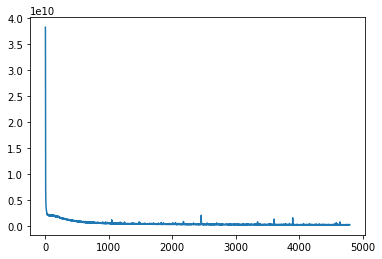

In [20]:
# Best score: -1327953115.2328768 Best param:{'batch_size': 48, 'epochs': 4800}
batch_size = 48
epochs = 4800
model_fit(batch_size, epochs, X_train, y_train, X_test)

Cost time: 184.91338324546814 s
RMSE: 26401.939756622247 
LOGRMSE: 0.12033880198053648


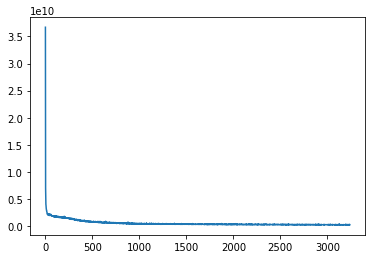

In [21]:
batch_size = 32
epochs = 3240
model_fit(batch_size, epochs, X_train, y_train, X_test)

In [22]:
model=create_model()
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=3240,batch_size=32,verbose=0)

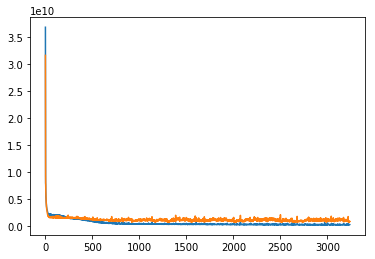

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

## 练习二 使用BatchNormalization层

- 使用SGD进行训练

In [25]:
from keras.layers import BatchNormalization,Activation
from keras import optimizers

In [65]:
def create_model2():
    model=Sequential()
    model.add(Dense(10,input_dim=X_train.shape[1]))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(300))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    #model.add(Dropout(0.2))
    model.add(Dense(50,activation='relu'))
    model.add(Dense(1))
    sgd = optimizers.SGD(lr=0.0000001, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(optimizer=sgd,loss='mean_squared_error')
    return model

In [66]:
def model_fit(batch_size, epochs, X_train, y_train, X_test):
    model = create_model2()

    start_time = time.time()
    history = model.fit(X_train,y_train,epochs=epochs,batch_size=batch_size,verbose=0)
    end_time = time.time()
    print("Cost time: {} s".format(end_time - start_time))
    benchmark(model,X_test, y_test)
    plt.plot(history.history['loss'])

In [63]:
batch_size = [32, 48, 64]
epochs = [2000, 3000, 3500, 4000, 4500, 5000]

model = KerasRegressor(build_fn=create_model2)

param_grid = dict(batch_size=batch_size,epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=0, cv=5, n_jobs=-1)
result = grid.fit(X_train, y_train)
for mean,stdev,param in zip(result.cv_results_['mean_test_score'],
                           result.cv_results_['std_test_score'],
                           result.cv_results_['params']):
    print("mean:{} stdev:{} param:{}".format(mean,stdev,param))
print("Best score: {} Best param:{}".format(result.best_score_, result.best_params_))

/root/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Epoch 1/3000
1168/1168 [==============================] - 3s 2ms/step - loss: 38993712506.7397
Epoch 2/3000
1168/1168 [==============================] - 0s 82us/step - loss: 38979970875.6164
Epoch 3/3000
1168/1168 [==============================] - 0s 81us/step - loss: 38947025344.8767
Epoch 4/3000
1168/1168 [==============================] - 0s 80us/step - loss: 38885555214.0274
Epoch 5/3000
1168/1168 [==============================] - 0s 82us/step - loss: 38793068095.1233
Epoch 6/3000
1168/1168 [==============================] - 0s 81us/step - loss: 38660363025.5342
Epoch 7/3000
1168/1168 [==============================] - 0s 81us/step - loss: 38484593453.5890
Epoch 8/3000
1168/1168 [==============================] - 0s 81us/step - loss: 38252189836.2740
Epoch 9/3000
1168/1168 [==============================] - 0s 80us/step - loss: 37958974814.6849
Epoch 10/3000
1168/1168 [==============================] - 0s 83us/step - loss: 37597408326.1370
Epoch 11/3000
1168/1168 [===============

1168/1168 [==============================] - 0s 82us/step - loss: 1081547719.0137
Epoch 87/3000
1168/1168 [==============================] - 0s 83us/step - loss: 1125849703.4521
Epoch 88/3000
1168/1168 [==============================] - 0s 82us/step - loss: 1136284670.2466
Epoch 89/3000
1168/1168 [==============================] - 0s 83us/step - loss: 1162068642.1918
Epoch 90/3000
1168/1168 [==============================] - 0s 83us/step - loss: 1140144064.0000
Epoch 91/3000
1168/1168 [==============================] - 0s 81us/step - loss: 993467875.0685
Epoch 92/3000
1168/1168 [==============================] - 0s 83us/step - loss: 1009766231.6712
Epoch 93/3000
1168/1168 [==============================] - 0s 81us/step - loss: 1022823868.4932
Epoch 94/3000
1168/1168 [==============================] - 0s 81us/step - loss: 1040982218.5205
Epoch 95/3000
1168/1168 [==============================] - 0s 82us/step - loss: 1235500140.7123
Epoch 96/3000
1168/1168 [==============================

1168/1168 [==============================] - 0s 81us/step - loss: 826059887.3425
Epoch 257/3000
1168/1168 [==============================] - 0s 85us/step - loss: 781017715.7260
Epoch 258/3000
1168/1168 [==============================] - 0s 83us/step - loss: 751885334.7945
Epoch 259/3000
1168/1168 [==============================] - 0s 82us/step - loss: 832804311.2329
Epoch 260/3000
1168/1168 [==============================] - 0s 82us/step - loss: 689737893.6986
Epoch 261/3000
1168/1168 [==============================] - 0s 81us/step - loss: 766288064.8767
Epoch 262/3000
1168/1168 [==============================] - 0s 81us/step - loss: 772836431.7808
Epoch 263/3000
1168/1168 [==============================] - 0s 81us/step - loss: 838219006.6849
Epoch 264/3000
1168/1168 [==============================] - 0s 80us/step - loss: 799528845.1507
Epoch 265/3000
1168/1168 [==============================] - 0s 80us/step - loss: 828494826.9589
Epoch 266/3000
1168/1168 [=============================

1168/1168 [==============================] - 0s 82us/step - loss: 551859452.4932
Epoch 427/3000
1168/1168 [==============================] - 0s 80us/step - loss: 574863292.0548
Epoch 428/3000
1168/1168 [==============================] - 0s 81us/step - loss: 607365832.3288
Epoch 429/3000
1168/1168 [==============================] - 0s 80us/step - loss: 615946958.4658
Epoch 430/3000
1168/1168 [==============================] - 0s 80us/step - loss: 731549821.8082
Epoch 431/3000
1168/1168 [==============================] - 0s 80us/step - loss: 647014766.4658
Epoch 432/3000
1168/1168 [==============================] - 0s 81us/step - loss: 688499198.6849
Epoch 433/3000
1168/1168 [==============================] - 0s 82us/step - loss: 679526040.5479
Epoch 434/3000
1168/1168 [==============================] - 0s 80us/step - loss: 693490616.9863
Epoch 435/3000
1168/1168 [==============================] - 0s 81us/step - loss: 584633651.7260
Epoch 436/3000
1168/1168 [=============================

1168/1168 [==============================] - 0s 79us/step - loss: 792986342.3562
Epoch 597/3000
1168/1168 [==============================] - 0s 80us/step - loss: 683031516.9315
Epoch 598/3000
1168/1168 [==============================] - 0s 79us/step - loss: 644291735.6712
Epoch 599/3000
1168/1168 [==============================] - 0s 81us/step - loss: 720492567.6712
Epoch 600/3000
1168/1168 [==============================] - 0s 79us/step - loss: 705105575.8904
Epoch 601/3000
1168/1168 [==============================] - 0s 79us/step - loss: 547121327.1233
Epoch 602/3000
1168/1168 [==============================] - 0s 80us/step - loss: 666351698.8493
Epoch 603/3000
1168/1168 [==============================] - 0s 79us/step - loss: 645448142.4658
Epoch 604/3000
1168/1168 [==============================] - 0s 80us/step - loss: 590853052.9315
Epoch 605/3000
1168/1168 [==============================] - 0s 80us/step - loss: 708638563.5068
Epoch 606/3000
1168/1168 [=============================

1168/1168 [==============================] - 0s 82us/step - loss: 505148512.4384
Epoch 767/3000
1168/1168 [==============================] - 0s 81us/step - loss: 480956351.1233
Epoch 768/3000
1168/1168 [==============================] - 0s 83us/step - loss: 516209756.0548
Epoch 769/3000
1168/1168 [==============================] - 0s 83us/step - loss: 599747669.6986
Epoch 770/3000
1168/1168 [==============================] - 0s 82us/step - loss: 562858126.0274
Epoch 771/3000
1168/1168 [==============================] - 0s 82us/step - loss: 617553532.9315
Epoch 772/3000
1168/1168 [==============================] - 0s 82us/step - loss: 569131839.7808
Epoch 773/3000
1168/1168 [==============================] - 0s 85us/step - loss: 565112886.7945
Epoch 774/3000
1168/1168 [==============================] - 0s 82us/step - loss: 612198213.6986
Epoch 775/3000
1168/1168 [==============================] - 0s 83us/step - loss: 650552974.9041
Epoch 776/3000
1168/1168 [=============================

1168/1168 [==============================] - 0s 80us/step - loss: 492013736.7671
Epoch 937/3000
1168/1168 [==============================] - 0s 81us/step - loss: 575373820.9315
Epoch 938/3000
1168/1168 [==============================] - 0s 81us/step - loss: 489989804.2740
Epoch 939/3000
1168/1168 [==============================] - 0s 81us/step - loss: 609426523.6164
Epoch 940/3000
1168/1168 [==============================] - 0s 81us/step - loss: 665822311.4521
Epoch 941/3000
1168/1168 [==============================] - 0s 81us/step - loss: 542228693.0411
Epoch 942/3000
1168/1168 [==============================] - 0s 81us/step - loss: 552218043.6164
Epoch 943/3000
1168/1168 [==============================] - 0s 81us/step - loss: 658747915.3973
Epoch 944/3000
1168/1168 [==============================] - 0s 80us/step - loss: 739837747.7260
Epoch 945/3000
1168/1168 [==============================] - 0s 81us/step - loss: 522795528.7671
Epoch 946/3000
1168/1168 [=============================

1168/1168 [==============================] - 0s 81us/step - loss: 460211456.0000
Epoch 1106/3000
1168/1168 [==============================] - 0s 82us/step - loss: 471100100.8219
Epoch 1107/3000
1168/1168 [==============================] - 0s 81us/step - loss: 576182247.8904
Epoch 1108/3000
1168/1168 [==============================] - 0s 82us/step - loss: 471469654.7945
Epoch 1109/3000
1168/1168 [==============================] - 0s 81us/step - loss: 569018332.4932
Epoch 1110/3000
1168/1168 [==============================] - 0s 80us/step - loss: 441715807.5616
Epoch 1111/3000
1168/1168 [==============================] - 0s 80us/step - loss: 501986965.4795
Epoch 1112/3000
1168/1168 [==============================] - 0s 82us/step - loss: 585740327.8904
Epoch 1113/3000
1168/1168 [==============================] - 0s 82us/step - loss: 570628728.7671
Epoch 1114/3000
1168/1168 [==============================] - 0s 82us/step - loss: 524546961.9726
Epoch 1115/3000
1168/1168 [===================

1168/1168 [==============================] - 0s 79us/step - loss: 507394015.1233
Epoch 1274/3000
1168/1168 [==============================] - 0s 75us/step - loss: 487540374.3562
Epoch 1275/3000
1168/1168 [==============================] - 0s 78us/step - loss: 446786687.5616
Epoch 1276/3000
1168/1168 [==============================] - 0s 76us/step - loss: 592299630.4658
Epoch 1277/3000
1168/1168 [==============================] - 0s 80us/step - loss: 617420690.8493
Epoch 1278/3000
1168/1168 [==============================] - 0s 80us/step - loss: 565064359.6712
Epoch 1279/3000
1168/1168 [==============================] - 0s 79us/step - loss: 495025243.1781
Epoch 1280/3000
1168/1168 [==============================] - 0s 81us/step - loss: 491735303.4521
Epoch 1281/3000
1168/1168 [==============================] - 0s 80us/step - loss: 543464917.2603
Epoch 1282/3000
1168/1168 [==============================] - 0s 77us/step - loss: 491295089.7534
Epoch 1283/3000
1168/1168 [===================

1168/1168 [==============================] - 0s 80us/step - loss: 522782813.8082
Epoch 1442/3000
1168/1168 [==============================] - 0s 79us/step - loss: 471747107.5068
Epoch 1443/3000
1168/1168 [==============================] - 0s 87us/step - loss: 497214904.5479
Epoch 1444/3000
1168/1168 [==============================] - 0s 90us/step - loss: 517655206.1370
Epoch 1445/3000
1168/1168 [==============================] - 0s 80us/step - loss: 475174767.3425
Epoch 1446/3000
1168/1168 [==============================] - 0s 83us/step - loss: 485818984.5479
Epoch 1447/3000
1168/1168 [==============================] - 0s 78us/step - loss: 553245867.3973
Epoch 1448/3000
1168/1168 [==============================] - 0s 82us/step - loss: 517470411.8356
Epoch 1449/3000
1168/1168 [==============================] - 0s 81us/step - loss: 445807927.6712
Epoch 1450/3000
1168/1168 [==============================] - 0s 82us/step - loss: 547322520.9863
Epoch 1451/3000
1168/1168 [===================

1168/1168 [==============================] - 0s 80us/step - loss: 533217927.8904
Epoch 1610/3000
1168/1168 [==============================] - 0s 80us/step - loss: 442998709.9178
Epoch 1611/3000
1168/1168 [==============================] - 0s 79us/step - loss: 458564787.9452
Epoch 1612/3000
1168/1168 [==============================] - 0s 81us/step - loss: 457206351.3425
Epoch 1613/3000
1168/1168 [==============================] - 0s 80us/step - loss: 486415358.2466
Epoch 1614/3000
1168/1168 [==============================] - 0s 80us/step - loss: 436236092.0548
Epoch 1615/3000
1168/1168 [==============================] - 0s 81us/step - loss: 386905869.1507
Epoch 1616/3000
1168/1168 [==============================] - 0s 80us/step - loss: 470831918.4658
Epoch 1617/3000
1168/1168 [==============================] - 0s 80us/step - loss: 385852242.1918
Epoch 1618/3000
1168/1168 [==============================] - 0s 81us/step - loss: 435216502.5753
Epoch 1619/3000
1168/1168 [===================

1168/1168 [==============================] - 0s 80us/step - loss: 442250195.0685
Epoch 1778/3000
1168/1168 [==============================] - 0s 82us/step - loss: 523729194.9589
Epoch 1779/3000
1168/1168 [==============================] - 0s 81us/step - loss: 446986265.6438
Epoch 1780/3000
1168/1168 [==============================] - 0s 80us/step - loss: 559792142.4658
Epoch 1781/3000
1168/1168 [==============================] - 0s 82us/step - loss: 448585336.9863
Epoch 1782/3000
1168/1168 [==============================] - 0s 82us/step - loss: 405249558.3562
Epoch 1783/3000
1168/1168 [==============================] - 0s 84us/step - loss: 460272731.6164
Epoch 1784/3000
1168/1168 [==============================] - 0s 83us/step - loss: 483474326.3562
Epoch 1785/3000
1168/1168 [==============================] - 0s 82us/step - loss: 520943852.2740
Epoch 1786/3000
1168/1168 [==============================] - 0s 82us/step - loss: 553448625.3151
Epoch 1787/3000
1168/1168 [===================

1168/1168 [==============================] - 0s 86us/step - loss: 414898915.7260
Epoch 1946/3000
1168/1168 [==============================] - 0s 84us/step - loss: 347749356.2740
Epoch 1947/3000
1168/1168 [==============================] - 0s 84us/step - loss: 434308579.7260
Epoch 1948/3000
1168/1168 [==============================] - 0s 86us/step - loss: 392409786.5205
Epoch 1949/3000
1168/1168 [==============================] - 0s 85us/step - loss: 477447011.0685
Epoch 1950/3000
1168/1168 [==============================] - 0s 85us/step - loss: 383139553.5342
Epoch 1951/3000
1168/1168 [==============================] - 0s 83us/step - loss: 495377717.9178
Epoch 1952/3000
1168/1168 [==============================] - 0s 82us/step - loss: 463336807.2329
Epoch 1953/3000
1168/1168 [==============================] - 0s 84us/step - loss: 519781514.5205
Epoch 1954/3000
1168/1168 [==============================] - 0s 85us/step - loss: 421275388.9315
Epoch 1955/3000
1168/1168 [===================

1168/1168 [==============================] - 0s 82us/step - loss: 417371909.2603
Epoch 2114/3000
1168/1168 [==============================] - 0s 83us/step - loss: 431520386.4110
Epoch 2115/3000
1168/1168 [==============================] - 0s 82us/step - loss: 467581195.0685
Epoch 2116/3000
1168/1168 [==============================] - 0s 83us/step - loss: 459363644.2740
Epoch 2117/3000
1168/1168 [==============================] - 0s 80us/step - loss: 409883107.9452
Epoch 2118/3000
1168/1168 [==============================] - 0s 82us/step - loss: 464379596.7123
Epoch 2119/3000
1168/1168 [==============================] - 0s 81us/step - loss: 419396579.5068
Epoch 2120/3000
1168/1168 [==============================] - 0s 83us/step - loss: 322878917.0411
Epoch 2121/3000
1168/1168 [==============================] - 0s 82us/step - loss: 424679313.9726
Epoch 2122/3000
1168/1168 [==============================] - 0s 83us/step - loss: 420795278.9041
Epoch 2123/3000
1168/1168 [===================

1168/1168 [==============================] - 0s 85us/step - loss: 431498040.5479
Epoch 2282/3000
1168/1168 [==============================] - 0s 82us/step - loss: 417749753.2055
Epoch 2283/3000
1168/1168 [==============================] - 0s 83us/step - loss: 431842839.6712
Epoch 2284/3000
1168/1168 [==============================] - 0s 81us/step - loss: 406191587.0685
Epoch 2285/3000
1168/1168 [==============================] - 0s 84us/step - loss: 422382678.5753
Epoch 2286/3000
1168/1168 [==============================] - 0s 83us/step - loss: 451527215.3425
Epoch 2287/3000
1168/1168 [==============================] - 0s 83us/step - loss: 398114549.4795
Epoch 2288/3000
1168/1168 [==============================] - 0s 83us/step - loss: 348356977.9726
Epoch 2289/3000
1168/1168 [==============================] - 0s 82us/step - loss: 385037119.5616
Epoch 2290/3000
1168/1168 [==============================] - 0s 83us/step - loss: 412177153.3151
Epoch 2291/3000
1168/1168 [===================

1168/1168 [==============================] - 0s 83us/step - loss: 388864807.8904
Epoch 2450/3000
1168/1168 [==============================] - 0s 82us/step - loss: 365490933.0411
Epoch 2451/3000
1168/1168 [==============================] - 0s 83us/step - loss: 367828780.0548
Epoch 2452/3000
1168/1168 [==============================] - 0s 82us/step - loss: 329156281.8630
Epoch 2453/3000
1168/1168 [==============================] - 0s 82us/step - loss: 343265735.0137
Epoch 2454/3000
1168/1168 [==============================] - 0s 82us/step - loss: 414101625.6438
Epoch 2455/3000
1168/1168 [==============================] - 0s 82us/step - loss: 439143738.5205
Epoch 2456/3000
1168/1168 [==============================] - 0s 84us/step - loss: 657729282.1918
Epoch 2457/3000
1168/1168 [==============================] - 0s 85us/step - loss: 422160271.7808
Epoch 2458/3000
1168/1168 [==============================] - 0s 82us/step - loss: 549287548.0548
Epoch 2459/3000
1168/1168 [===================

1168/1168 [==============================] - 0s 78us/step - loss: 352835986.4110
Epoch 2618/3000
1168/1168 [==============================] - 0s 80us/step - loss: 394437912.5479
Epoch 2619/3000
1168/1168 [==============================] - 0s 81us/step - loss: 335361879.2329
Epoch 2620/3000
1168/1168 [==============================] - 0s 79us/step - loss: 482092669.3699
Epoch 2621/3000
1168/1168 [==============================] - 0s 79us/step - loss: 377721128.3288
Epoch 2622/3000
1168/1168 [==============================] - 0s 79us/step - loss: 387030592.8767
Epoch 2623/3000
1168/1168 [==============================] - 0s 75us/step - loss: 357496153.2055
Epoch 2624/3000
1168/1168 [==============================] - 0s 80us/step - loss: 351864778.0822
Epoch 2625/3000
1168/1168 [==============================] - 0s 81us/step - loss: 332712983.6712
Epoch 2626/3000
1168/1168 [==============================] - 0s 80us/step - loss: 322230439.2329
Epoch 2627/3000
1168/1168 [===================

1168/1168 [==============================] - 0s 82us/step - loss: 345086253.5890
Epoch 2786/3000
1168/1168 [==============================] - 0s 83us/step - loss: 490243537.9726
Epoch 2787/3000
1168/1168 [==============================] - 0s 81us/step - loss: 363879807.6712
Epoch 2788/3000
1168/1168 [==============================] - 0s 81us/step - loss: 368952996.3836
Epoch 2789/3000
1168/1168 [==============================] - 0s 82us/step - loss: 348946281.2055
Epoch 2790/3000
1168/1168 [==============================] - 0s 82us/step - loss: 341614266.7397
Epoch 2791/3000
1168/1168 [==============================] - 0s 82us/step - loss: 423615805.3699
Epoch 2792/3000
1168/1168 [==============================] - 0s 82us/step - loss: 540122509.1507
Epoch 2793/3000
1168/1168 [==============================] - 0s 82us/step - loss: 396745310.6849
Epoch 2794/3000
1168/1168 [==============================] - 0s 82us/step - loss: 316569905.3151
Epoch 2795/3000
1168/1168 [===================

1168/1168 [==============================] - 0s 82us/step - loss: 406367728.2192
Epoch 2954/3000
1168/1168 [==============================] - 0s 81us/step - loss: 337816067.0685
Epoch 2955/3000
1168/1168 [==============================] - 0s 82us/step - loss: 292837383.6712
Epoch 2956/3000
1168/1168 [==============================] - 0s 81us/step - loss: 287417129.6438
Epoch 2957/3000
1168/1168 [==============================] - 0s 81us/step - loss: 331519579.7260
Epoch 2958/3000
1168/1168 [==============================] - 0s 88us/step - loss: 355931356.7123
Epoch 2959/3000
1168/1168 [==============================] - 0s 82us/step - loss: 354972079.7808
Epoch 2960/3000
1168/1168 [==============================] - 0s 82us/step - loss: 286262889.4247
Epoch 2961/3000
1168/1168 [==============================] - 0s 82us/step - loss: 378193614.9041
Epoch 2962/3000
1168/1168 [==============================] - 0s 82us/step - loss: 403764477.3699
Epoch 2963/3000
1168/1168 [===================

In [67]:
# Best score: -1389469387.3561645 Best param:{'batch_size': 32, 'epochs': 3000}
batch_size = 32
epochs = 3000
model_fit(batch_size, epochs, X_train, y_train, X_test)

Cost time: 255.20741438865662 s


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [40]:
# 负数没法取log，回归问题对于outlier处理不好？比如说 大家随机分的评测级 包含了全局最大值 那么 如果训练的过拟合 就会预测成为负数；大家可以把benchmark做修改 例如如果是负数让它变为绝对值
# ValueError: Input contains NaN, infinity or a value too large for dtype('float32').
# https://www.zhihu.com/question/49346370
# 梯度爆炸了吧。 我的解决办法一般以下几条： 
# 1、数据归一化（减均值，除方差，或者加入normalization，例如BN、L2 norm等）； 
# 2、更换参数初始化方法（对于CNN，一般用xavier或者msra的初始化方法）； 
# 3、减小学习率、减小batch size； 
# 4、加入gradient clipping；

(array([], dtype=int64),)

## 练习三
- 房价使用log或者以万为单位

In [68]:
y_train_log=np.log(y_train)
y_train_wan=y_train/10000

In [69]:
y_test_log=np.log(y_test)
y_test_wan=y_test/10000

In [70]:
from sklearn.preprocessing import RobustScaler

In [71]:
def create_model3():
    model=Sequential()
    model.add(Dense(10,input_dim=X_train.shape[1]))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(300))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    #model.add(Dropout(0.2))
    model.add(Dense(50,activation='relu'))
    model.add(Dense(1))
    #sgd = optimizers.SGD(optimizer='adam',loss='mean_squared_error')
    model.compile(optimizer='adam',loss='mean_squared_error')
    return model

In [72]:
model=create_model3()
history=model.fit(X_train,y_train_wan,validation_data=(X_test,y_test_wan),epochs=3000,batch_size=32,verbose=0)

In [74]:
benchmark(model,X_test,y_test_wan)

RMSE: 3.1713150043920235 
LOGRMSE: 0.15695318455036922


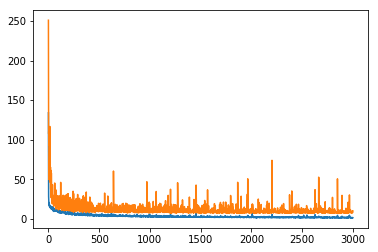

In [78]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [76]:
benchmark1(model,X_test,y_test_wan)

RMSE: 182741.57888359908 
LOGRMSE: 9.181887505186484


In [82]:
def grid_search(model_func,X_train,y_train,X_test,y_test,epochs,batch_size,verbose):
    model = model_func()
    for b in batch_size:
        for epoch in epochs:
            print("epoch:{} -- batch_size:{}".format(epoch, b))
            history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=epoch,batch_size=b,verbose=verbose)
            benchmark(model,X_test,y_test)
            print("-"*50)

In [83]:
batch_size = [32, 48, 64]
epochs = [2000, 3000, 3500, 4000, 4500, 5000]
grid_search(create_model3,X_train,y_train_wan,X_test,y_test_wan,epochs,batch_size,verbose=0)

epoch:2000 -- batch_size:32
RMSE: 3.148683249895711 
LOGRMSE: 0.14387862978129495
--------------------------------------------------
epoch:3000 -- batch_size:32
RMSE: 2.9782105190041674 
LOGRMSE: 0.13216228688535808
--------------------------------------------------
epoch:3500 -- batch_size:32
RMSE: 2.8241274872097715 
LOGRMSE: 0.14058606656050132
--------------------------------------------------
epoch:4000 -- batch_size:32
RMSE: 3.0642325087552513 
LOGRMSE: 0.14686445004223178
--------------------------------------------------
epoch:4500 -- batch_size:32
RMSE: 2.9697457357404873 
LOGRMSE: 0.1458438013052856
--------------------------------------------------
epoch:5000 -- batch_size:32
RMSE: 3.0053873471214776 
LOGRMSE: 0.1513725833596386
--------------------------------------------------
epoch:2000 -- batch_size:48
RMSE: 2.9449132149116917 
LOGRMSE: 0.14327735072222178
--------------------------------------------------
epoch:3000 -- batch_size:48
RMSE: 2.9386131820195867 
LOGRMSE: 0.

In [85]:
batch_size = [32]
epochs = range(2600,3500,100)
grid_search(create_model3,X_train,y_train_wan,X_test,y_test_wan,epochs,batch_size,verbose=0)

epoch:2600 -- batch_size:32
RMSE: 3.628607526154356 
LOGRMSE: 0.15873669835065618
--------------------------------------------------
epoch:2700 -- batch_size:32
RMSE: 3.3069344676047456 
LOGRMSE: 0.13343433856729756
--------------------------------------------------
epoch:2800 -- batch_size:32
RMSE: 3.0493717786705345 
LOGRMSE: 0.1450162064917259
--------------------------------------------------
epoch:2900 -- batch_size:32
RMSE: 3.2045954003914594 
LOGRMSE: 0.14517843913654196
--------------------------------------------------
epoch:3000 -- batch_size:32
RMSE: 3.1522039155177635 
LOGRMSE: 0.14874941287745705
--------------------------------------------------
epoch:3100 -- batch_size:32
RMSE: 3.142419631445947 
LOGRMSE: 0.14706393231631765
--------------------------------------------------
epoch:3200 -- batch_size:32
RMSE: 3.328734569898689 
LOGRMSE: 0.15448721215517539
--------------------------------------------------
epoch:3300 -- batch_size:32
RMSE: 3.0668851150985326 
LOGRMSE: 0.1

In [94]:
batch_size = [32, 48, 64]
epochs = [2000, 3000, 3500, 4000, 4500, 5000]
grid_search(create_model3,X_train,y_train_log,X_test,y_test_log,epochs,batch_size,verbose=0)

epoch:2000 -- batch_size:32
RMSE: 0.1680311114695571 
LOGRMSE: 0.014029552267969349
--------------------------------------------------
epoch:3000 -- batch_size:32
RMSE: 0.152456641410507 
LOGRMSE: 0.012870390093722987
--------------------------------------------------
epoch:3500 -- batch_size:32
RMSE: 0.15271511579995883 
LOGRMSE: 0.01284778612715501
--------------------------------------------------
epoch:4000 -- batch_size:32
RMSE: 0.14551550594755708 
LOGRMSE: 0.012261974899764409
--------------------------------------------------
epoch:4500 -- batch_size:32
RMSE: 0.1474883008399185 
LOGRMSE: 0.012444982561498657
--------------------------------------------------
epoch:5000 -- batch_size:32
RMSE: 0.15485397045065835 
LOGRMSE: 0.012905463033692919
--------------------------------------------------
epoch:2000 -- batch_size:48
RMSE: 0.14690707087142446 
LOGRMSE: 0.012400911234915423
--------------------------------------------------
epoch:3000 -- batch_size:48
RMSE: 0.1753082726680265 

## 练习四
- 使用RobustScaler()训练

In [86]:
transformer=RobustScaler().fit(X_train)

In [87]:
X_train_norm=transformer.transform(X_train)
X_test_norm=transformer.transform(X_test)

In [88]:
def create_model4():
    model=Sequential()
    model.add(Dense(10,input_dim=X_train.shape[1]))
    #model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(300))
    #model.add(BatchNormalization())
    model.add(Activation('relu'))
    #model.add(Dropout(0.2))
    model.add(Dense(50,activation='relu'))
    model.add(Dense(1))
    #sgd = optimizers.SGD(optimizer='adam',loss='mean_squared_error')
    model.compile(optimizer='adam',loss='mean_squared_error')
    return model

In [89]:
batch_size = [32, 48, 64]
epochs = [2000, 3000, 3500, 4000, 4500, 5000]
grid_search(create_model4,X_train_norm,y_train,X_test_norm,y_test,epochs,batch_size,verbose=0)

epoch:2000 -- batch_size:32
RMSE: 27719.814703165077 
LOGRMSE: 0.1434851712950422
--------------------------------------------------
epoch:3000 -- batch_size:32
RMSE: 39465.673892907645 
LOGRMSE: 0.20832710255632372
--------------------------------------------------
epoch:3500 -- batch_size:32
RMSE: 41297.551120912416 
LOGRMSE: 0.22879263345963388
--------------------------------------------------
epoch:4000 -- batch_size:32
RMSE: 40805.66856282269 
LOGRMSE: 0.2282102118850337
--------------------------------------------------
epoch:4500 -- batch_size:32
RMSE: 39623.786039556835 
LOGRMSE: 0.22035442555048232
--------------------------------------------------
epoch:5000 -- batch_size:32
RMSE: 38820.17197496433 
LOGRMSE: 0.21783686498678137
--------------------------------------------------
epoch:2000 -- batch_size:48
RMSE: 38660.20804576314 
LOGRMSE: 0.21462576251597568
--------------------------------------------------
epoch:3000 -- batch_size:48
RMSE: 38007.93805677153 
LOGRMSE: 0.215

In [90]:
batch_size = [16,32]
epochs = [1000,1500,2000]
grid_search(create_model4,X_train_norm,y_train,X_test_norm,y_test,epochs,batch_size,verbose=0)

epoch:1000 -- batch_size:16
RMSE: 30375.989302815487 
LOGRMSE: 0.1503043210925114
--------------------------------------------------
epoch:1500 -- batch_size:16
RMSE: 37992.7374167947 
LOGRMSE: 0.19067429780036174
--------------------------------------------------
epoch:2000 -- batch_size:16
RMSE: 36897.83059249577 
LOGRMSE: 0.20334440259251826
--------------------------------------------------
epoch:1000 -- batch_size:32
RMSE: 37337.42716761466 
LOGRMSE: 0.20394383775938418
--------------------------------------------------
epoch:1500 -- batch_size:32
RMSE: 37896.74807284492 
LOGRMSE: 0.20229591886922288
--------------------------------------------------
epoch:2000 -- batch_size:32
RMSE: 38873.6669481891 
LOGRMSE: 0.21998074126286898
--------------------------------------------------


In [91]:
batch_size = [16]
epochs = [500,700,1000]
grid_search(create_model4,X_train_norm,y_train,X_test_norm,y_test,epochs,batch_size,verbose=0)

epoch:500 -- batch_size:16
RMSE: 26913.024802251904 
LOGRMSE: 0.1355209223695105
--------------------------------------------------
epoch:700 -- batch_size:16
RMSE: 28317.00099267788 
LOGRMSE: 0.14993836325835594
--------------------------------------------------
epoch:1000 -- batch_size:16
RMSE: 32640.400229356146 
LOGRMSE: 0.17574164652147148
--------------------------------------------------


In [93]:
batch_size = [8,16]
epochs = range(100,700,100)
grid_search(create_model4,X_train_norm,y_train,X_test_norm,y_test,epochs,batch_size,verbose=0)

epoch:100 -- batch_size:8
RMSE: 30219.51948365487 
LOGRMSE: 0.3210006803774388
--------------------------------------------------
epoch:200 -- batch_size:8
RMSE: 26136.932756374605 
LOGRMSE: 0.14548925922819894
--------------------------------------------------
epoch:300 -- batch_size:8
RMSE: 27885.81433864393 
LOGRMSE: 0.17026886930750557
--------------------------------------------------
epoch:400 -- batch_size:8
RMSE: 30819.518432778732 
LOGRMSE: 0.17734261709014532
--------------------------------------------------
epoch:500 -- batch_size:8
RMSE: 30988.54385794572 
LOGRMSE: 0.17633044422956712
--------------------------------------------------
epoch:600 -- batch_size:8
RMSE: 32780.44071891914 
LOGRMSE: 0.17439304633204655
--------------------------------------------------
epoch:100 -- batch_size:16
RMSE: 33301.638979460484 
LOGRMSE: 0.18207309380575912
--------------------------------------------------
epoch:200 -- batch_size:16
RMSE: 33589.5971203307 
LOGRMSE: 0.18461956879651692
